In [582]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [583]:
data = pd.read_csv("case_study.csv")

In [584]:
data.head()

,How are you feeling about the upcoming Semester Exam,How is your Preparation,What is your feeling in one word,Analysis
0,Feeling No like all says that I have to study ...,Intermediate,Good,1
1,Feeling good,Going well.,Good,1
2,feel as suicide,i can say very bad,Bad,0
3,Fare in mind,Nothing,Bad,0
4,I am quite scared,Not prepared yet,Bad,0


In [585]:
columns = ["feelings", "prepration", "sentiments", "class"]
data.columns = columns

In [586]:
data.columns

Index(['feelings', 'prepration', 'sentiments', 'class'], dtype='object')

In [587]:
data["feelings_lower"] = data["feelings"].str.lower()
data["prepration_lower"] = data["prepration"].str.lower()
data["sentiments_lower"] = data["sentiments"].str.lower()
data.head()

,feelings,prepration,sentiments,class,feelings_lower,prepration_lower,sentiments_lower
0,Feeling No like all says that I have to study ...,Intermediate,Good,1,feeling no like all says that i have to study ...,intermediate,good
1,Feeling good,Going well.,Good,1,feeling good,going well.,good
2,feel as suicide,i can say very bad,Bad,0,feel as suicide,i can say very bad,bad
3,Fare in mind,Nothing,Bad,0,fare in mind,nothing,bad
4,I am quite scared,Not prepared yet,Bad,0,i am quite scared,not prepared yet,bad


In [588]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["feelings_punc"] = data["feelings_lower"].apply(lambda text: remove_punctuation(text))
data["prepration_punc"] = data["prepration_lower"].apply(lambda text: remove_punctuation(text))
data["sentiments_punc"] = data["sentiments_lower"].apply(lambda text: remove_punctuation(text))
data.head()

,feelings,prepration,sentiments,class,feelings_lower,prepration_lower,sentiments_lower,feelings_punc,prepration_punc,sentiments_punc
0,Feeling No like all says that I have to study ...,Intermediate,Good,1,feeling no like all says that i have to study ...,intermediate,good,feeling no like all says that i have to study ...,intermediate,good
1,Feeling good,Going well.,Good,1,feeling good,going well.,good,feeling good,going well,good
2,feel as suicide,i can say very bad,Bad,0,feel as suicide,i can say very bad,bad,feel as suicide,i can say very bad,bad
3,Fare in mind,Nothing,Bad,0,fare in mind,nothing,bad,fare in mind,nothing,bad
4,I am quite scared,Not prepared yet,Bad,0,i am quite scared,not prepared yet,bad,i am quite scared,not prepared yet,bad


In [589]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [590]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["feeling_stop"] = data["feelings_punc"].apply(lambda text: remove_stopwords(text))
data["prepration_stop"] = data["prepration_punc"].apply(lambda text: remove_stopwords(text))

data.head()

,feelings,prepration,sentiments,class,feelings_lower,prepration_lower,sentiments_lower,feelings_punc,prepration_punc,sentiments_punc,feeling_stop,prepration_stop
0,Feeling No like all says that I have to study ...,Intermediate,Good,1,feeling no like all says that i have to study ...,intermediate,good,feeling no like all says that i have to study ...,intermediate,good,feeling like says study much,intermediate
1,Feeling good,Going well.,Good,1,feeling good,going well.,good,feeling good,going well,good,feeling good,going well
2,feel as suicide,i can say very bad,Bad,0,feel as suicide,i can say very bad,bad,feel as suicide,i can say very bad,bad,feel suicide,say bad
3,Fare in mind,Nothing,Bad,0,fare in mind,nothing,bad,fare in mind,nothing,bad,fare mind,nothing
4,I am quite scared,Not prepared yet,Bad,0,i am quite scared,not prepared yet,bad,i am quite scared,not prepared yet,bad,quite scared,prepared yet


In [591]:
data.columns

Index(['feelings', 'prepration', 'sentiments', 'class', 'feelings_lower',
       'prepration_lower', 'sentiments_lower', 'feelings_punc',
       'prepration_punc', 'sentiments_punc', 'feeling_stop',
       'prepration_stop'],
      dtype='object')

In [592]:
data = data.drop(['feelings', 'prepration', 'sentiments', 'feelings_lower',
       'prepration_lower', 'sentiments_lower', 'feelings_punc',
       'prepration_punc'], axis = 1)

In [593]:
data.head()

,class,sentiments_punc,feeling_stop,prepration_stop
0,1,good,feeling like says study much,intermediate
1,1,good,feeling good,going well
2,0,bad,feel suicide,say bad
3,0,bad,fare mind,nothing
4,0,bad,quite scared,prepared yet


In [594]:
data["sentiments_punc"].unique()

array(['good', 'bad'], dtype=object)

In [595]:
from nltk.tokenize import WhitespaceTokenizer
def tokenization(text):
    tk = WhitespaceTokenizer()
    return tk.tokenize(text)
 
#applying function to the column for making tokens in both Training and Testing data
data['tokenised_feelings']= data['feeling_stop'].apply(lambda x: tokenization(x))
data['tokenised_prepration']= data['prepration_stop'].apply(lambda x: tokenization(x))

data.head()

,class,sentiments_punc,feeling_stop,prepration_stop,tokenised_feelings,tokenised_prepration
0,1,good,feeling like says study much,intermediate,"[feeling, like, says, study, much]",[intermediate]
1,1,good,feeling good,going well,"[feeling, good]","[going, well]"
2,0,bad,feel suicide,say bad,"[feel, suicide]","[say, bad]"
3,0,bad,fare mind,nothing,"[fare, mind]",[nothing]
4,0,bad,quite scared,prepared yet,"[quite, scared]","[prepared, yet]"


In [596]:
data = pd.DataFrame(data)

In [597]:
# Define a function to lemmatization
def lemmatize(tokens):
    """This function lemmatize the messages"""
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Create the lemmatized list
    lemmatized = []
    for token in tokens:
            # Lemmatize and append
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

# Apply our function to tokens
data["feeling_lemmatize"] =  data["tokenised_feelings"].apply(lambda text: lemmatize(text))
data["prepration_lemmatize"] =  data["tokenised_prepration"].apply(lambda text: lemmatize(text))


In [598]:
data.head()

,class,sentiments_punc,feeling_stop,prepration_stop,tokenised_feelings,tokenised_prepration,feeling_lemmatize,prepration_lemmatize
0,1,good,feeling like says study much,intermediate,"[feeling, like, says, study, much]",[intermediate],feeling like say study much,intermediate
1,1,good,feeling good,going well,"[feeling, good]","[going, well]",feeling good,going well
2,0,bad,feel suicide,say bad,"[feel, suicide]","[say, bad]",feel suicide,say bad
3,0,bad,fare mind,nothing,"[fare, mind]",[nothing],fare mind,nothing
4,0,bad,quite scared,prepared yet,"[quite, scared]","[prepared, yet]",quite scared,prepared yet


In [599]:
data.columns

Index(['class', 'sentiments_punc', 'feeling_stop', 'prepration_stop',
       'tokenised_feelings', 'tokenised_prepration', 'feeling_lemmatize',
       'prepration_lemmatize'],
      dtype='object')

In [600]:
data = data.drop(['feeling_stop', 'prepration_stop',
       'tokenised_feelings', 'tokenised_prepration'], axis = 1)

In [601]:
data.head()

,class,sentiments_punc,feeling_lemmatize,prepration_lemmatize
0,1,good,feeling like say study much,intermediate
1,1,good,feeling good,going well
2,0,bad,feel suicide,say bad
3,0,bad,fare mind,nothing
4,0,bad,quite scared,prepared yet


In [602]:
columns = ["class","sentiments", "feelings", "prepration"]
data.columns = columns

In [603]:
data.head()

,class,sentiments,feelings,prepration
0,1,good,feeling like say study much,intermediate
1,1,good,feeling good,going well
2,0,bad,feel suicide,say bad
3,0,bad,fare mind,nothing
4,0,bad,quite scared,prepared yet


#  Strating Naive Bayes

In [604]:
import matplotlib.pyplot as plt
import seaborn as sns

# We will visualize the messages with a word cloud
from wordcloud import WordCloud

# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# # I will keep the resulting plots
# %matplotlib inline

# # Enable Jupyter Notebook's intellisense
# %config IPCompleter.greedy=True

In [605]:
print(data['sentiments'].value_counts())

bad     157
good     89
Name: sentiments, dtype: int64


In [606]:
# Print the proportions of each category
print(data['sentiments'].value_counts(normalize=True))

bad     0.638211
good    0.361789
Name: sentiments, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


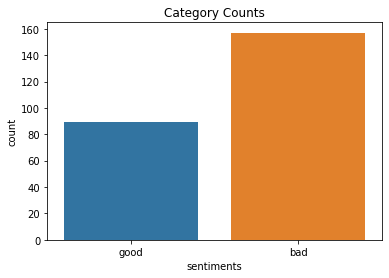

<Figure size 1440x720 with 0 Axes>

In [607]:
# Visualize the Categories
sns.countplot(data['sentiments'])
plt.title("Category Counts")
plt.figure(figsize=(20,10))
plt.show()

## Label Encoder

In [608]:
# Initialize the Label Encoder.
le = LabelEncoder()

# Encode the categories
data['Category_enc'] = le.fit_transform(data['sentiments'])

# Display the first five rows again to see the result
display(data.head())

# Print the datatypes
corpus=[]
print(data.dtypes)

,class,sentiments,feelings,prepration,Category_enc
0,1,good,feeling like say study much,intermediate,1
1,1,good,feeling good,going well,1
2,0,bad,feel suicide,say bad,0
3,0,bad,fare mind,nothing,0
4,0,bad,quite scared,prepared yet,0


class            int64
sentiments      object
feelings        object
prepration      object
Category_enc     int32
dtype: object


In [609]:
data.head()

,class,sentiments,feelings,prepration,Category_enc
0,1,good,feeling like say study much,intermediate,1
1,1,good,feeling good,going well,1
2,0,bad,feel suicide,say bad,0
3,0,bad,fare mind,nothing,0
4,0,bad,quite scared,prepared yet,0


In [610]:
# X = data[['feelings','prepration']]
X = data['feelings']
y = data['Category_enc']

In [611]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=58)

In [612]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(196,)
(196,)
(50,)
(50,)


In [613]:
# Create the tf-idf vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = TfidfVectorizer(strip_accents='ascii')
count_vect = CountVectorizer(max_features = 320)

# First fit the vectorizer with our training set
X_tfidf_train = count_vect.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
X_tfidf_test = count_vect.transform(X_test)

In [614]:
# X_tfidf_train
# print()
# print(X_tfidf_test)

In [615]:
# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the model
nb.fit(X_tfidf_train, y_train)

# Print the accuracy score
print("Accuracy:",nb.score(X_tfidf_test, y_test))

Accuracy: 0.8


In [616]:
# Predict the labels
y_pred = nb.predict(X_tfidf_test)

In [617]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [618]:
# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

Confusion Matrix

[[35  0]
 [10  5]]


In [619]:
# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)



Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        35
           1       1.00      0.33      0.50        15

    accuracy                           0.80        50
   macro avg       0.89      0.67      0.69        50
weighted avg       0.84      0.80      0.76        50

